# Assignment 1
Perform a sentiment and readability analysis of two news articles using tools like NLTK, PyPDF2, and wordcloud in a Jupyter notebook

In [2]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')


[nltk_data] Downloading package punkt to C:\Users\Divya
[nltk_data]     Gunasekaran\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Divya
[nltk_data]     Gunasekaran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to C:\Users\Divya
[nltk_data]     Gunasekaran\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
from PyPDF2 import PdfReader

def extract_text_from_pdf(pdf_file):
    reader = PdfReader(pdf_file)
    text = ""
    for page in reader.pages:
        text += page.extract_text()
    return text

# Paths to the uploaded files
fox_news_pdf_path = "data/foxnews.com-Embattled Harvard University President Claudine Gay hit with more plagiarism charges.pdf"
reuters_pdf_path = "data/reuters.com-Harvard president will submit dissertation edits after plagiarism allegations.pdf"

# Extracting text from PDFs
fox_news_text = extract_text_from_pdf(fox_news_pdf_path)
reuters_text = extract_text_from_pdf(reuters_pdf_path)

print(fox_news_text[:1000])  # Display a sample of the text
print("\n")
print(reuters_text[:1000])  # Display a sample of the text


1 / 5Brian FloodEmbattled Harvard University President Claudine Gay hit
with more plagiarism charges
foxnews.com /media/embattled-harvard-university-president-claudine-gay-hit-more-plagiarism-charges
Media
Harvard ‘received a complaint outlining over 40 allegations of
plagiarism,’ according to the Free Beacon
 By Brian Flood  Fox News
Published December 20, 2023 12:59pm EST
Harvard president facing 40 new allegations of plagiarism
Fox News' Molly Line reports the latest on the allegations. 
Embattled Harvard University President Claudine Gay  has been slapped with additional
charges of plagiarism. 
The Washington Free Beacon  reported Harvard "received a complaint outlining over 40
allegations of plagiarism" against Gay on T uesday , noting a letter was sent to Harvard's
research integrity of ficer, Stacey Springs, outlining the claims. 
"The document paints a picture of a pattern of misconduct more extensive than has been
previously reported and puts the Harvard Corporation, the unive

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    return analyzer.polarity_scores(text)

fox_news_sentiment = analyze_sentiment(fox_news_text)
reuters_sentiment = analyze_sentiment(reuters_text)

print("Fox News Sentiment:", fox_news_sentiment)
print("Reuters Sentiment:", reuters_sentiment)


Fox News Sentiment: {'neg': 0.065, 'neu': 0.866, 'pos': 0.07, 'compound': 0.7243}
Reuters Sentiment: {'neg': 0.07, 'neu': 0.904, 'pos': 0.026, 'compound': -0.9719}


In [5]:
fox_headline = "Embattled Harvard University President Claudine Gay hit with more plagiarism charges"
reuters_headline = "Harvard president will submit dissertation edits after plagiarism allegations"

print("Fox Headline Sentiment:", analyze_sentiment(fox_headline))
print("Reuters Headline Sentiment:", analyze_sentiment(reuters_headline))


Fox Headline Sentiment: {'neg': 0.192, 'neu': 0.808, 'pos': 0.0, 'compound': -0.3353}
Reuters Headline Sentiment: {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [6]:
import textstat

# Assuming fox_news_text and reuters_text already contain the article text

# Flesch Reading Ease Score
print("Fox News - Flesch Reading Ease:", textstat.flesch_reading_ease(fox_news_text))
print("Reuters - Flesch Reading Ease:", textstat.flesch_reading_ease(reuters_text))

# Gunning Fog Index
print("Fox News - Gunning Fog Index:", textstat.gunning_fog(fox_news_text))
print("Reuters - Gunning Fog Index:", textstat.gunning_fog(reuters_text))

# Dale-Chall Readability Score
print("Fox News - Dale-Chall Readability:", textstat.dale_chall_readability_score(fox_news_text))
print("Reuters - Dale-Chall Readability:", textstat.dale_chall_readability_score(reuters_text))

Fox News - Flesch Reading Ease: 23.19
Reuters - Flesch Reading Ease: 23.77
Fox News - Gunning Fog Index: 17.79
Reuters - Gunning Fog Index: 15.16
Fox News - Dale-Chall Readability: 10.52
Reuters - Dale-Chall Readability: 10.32


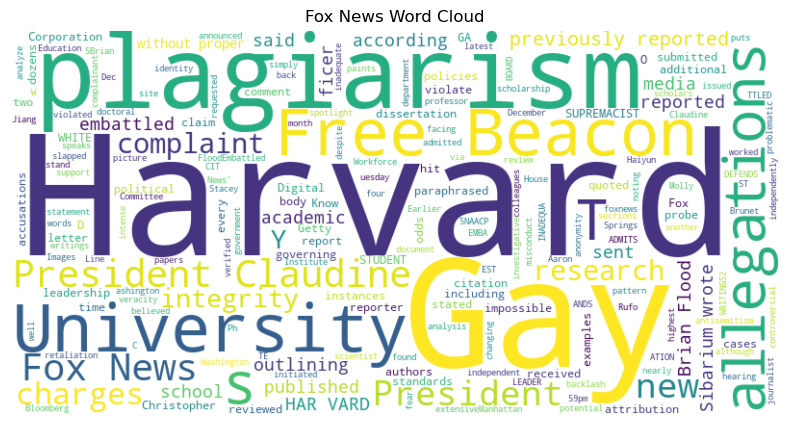

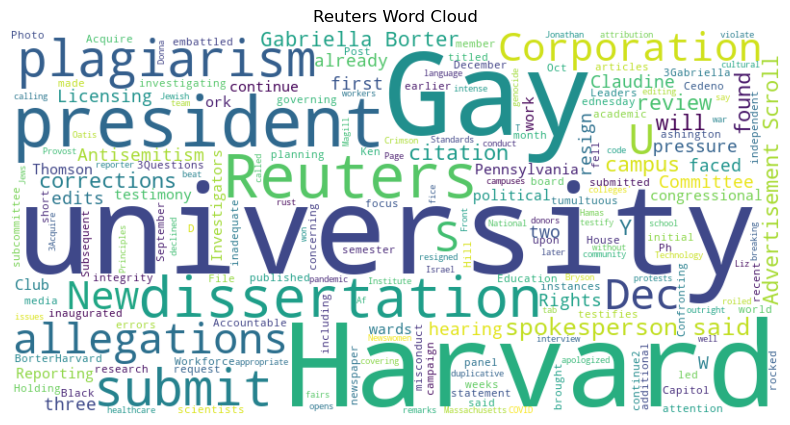

In [8]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(fox_news_text, "Fox News Word Cloud")
generate_wordcloud(reuters_text, "Reuters Word Cloud")


    